In [31]:
import pandas as pd
df_bitcoin=pd.read_csv('coin_Bitcoin.csv')

In [38]:

df_bitcoin.drop('Symbol',axis=1,inplace=True)
df_bitcoin.head()

,SNo,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [39]:
df_bitcoin.drop('SNo',axis=1,inplace=True)

In [40]:
df.info

<bound method DataFrame.info of          Name                 Date          High           Low          Open  \
0     Bitcoin  2013-04-29 23:59:59    147.488007    134.000000    134.444000   
1     Bitcoin  2013-04-30 23:59:59    146.929993    134.050003    144.000000   
2     Bitcoin  2013-05-01 23:59:59    139.889999    107.720001    139.000000   
3     Bitcoin  2013-05-02 23:59:59    125.599998     92.281898    116.379997   
4     Bitcoin  2013-05-03 23:59:59    108.127998     79.099998    106.250000   
...       ...                  ...           ...           ...           ...   
2857  Bitcoin  2021-02-23 23:59:59  54204.929756  45290.590268  54204.929756   
2858  Bitcoin  2021-02-24 23:59:59  51290.136695  47213.498162  48835.087661   
2859  Bitcoin  2021-02-25 23:59:59  51948.966982  47093.853019  49709.082425   
2860  Bitcoin  2021-02-26 23:59:59  48370.785260  44454.842114  47180.464054   
2861  Bitcoin  2021-02-27 23:59:59  48253.270101  45269.025766  46344.772237   

       

In [43]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AE3FCBD88>,
      dtype=object)

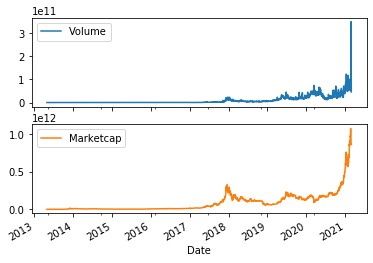

In [45]:
df.set_index('Date')[['Volume','Marketcap']].plot(subplots=True)

In [58]:
df_input=df[['High','Low', 'Open','Close','Volume','Marketcap']]

In [59]:
df_input

,High,Low,Open,Close,Volume,Marketcap
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2857,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [60]:
df_input.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


In [61]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [64]:
features=data_scaled

In [88]:
targets=features[:-1]
target=data_scaled[:,5]

In [89]:
data_scaled

array([[1.25183495e-03, 1.23138986e-03, 1.14747902e-03, 1.32429077e-03,
        0.00000000e+00, 7.70293355e-04],
       [1.24225630e-03, 1.23228909e-03, 1.31377376e-03, 1.22789530e-03,
        0.00000000e+00, 7.13404321e-04],
       [1.12141051e-03, 7.58788226e-04, 1.22676312e-03, 8.44922917e-04,
        0.00000000e+00, 4.85814987e-04],
       ...,
       [8.90455851e-01, 8.45725473e-01, 8.63851723e-01, 8.18238808e-01,
        1.55303546e-01, 8.18478850e-01],
       [8.29034177e-01, 7.98267295e-01, 8.19848380e-01, 8.05117648e-01,
        1.00000000e+00, 8.05399943e-01],
       [8.27016957e-01, 8.12909020e-01, 8.05305564e-01, 8.02484886e-01,
        1.30812365e-01, 8.02810882e-01]])

In [90]:
from keras.preprocessing.sequence import TimeseriesGenerator
TimeseriesGenerator(features,target,length=30,sampling_rate=1,batch_size=1)[0]

(array([[[0.00125183, 0.00123139, 0.00114748, 0.00132429, 0.        ,
          0.00077029],
         [0.00124226, 0.00123229, 0.00131377, 0.0012279 , 0.        ,
          0.0007134 ],
         [0.00112141, 0.00075879, 0.00122676, 0.00084492, 0.        ,
          0.00048581],
         [0.00087611, 0.00048116, 0.00083313, 0.00063995, 0.        ,
          0.00036408],
         [0.0005762 , 0.00024411, 0.00065684, 0.00051015, 0.        ,
          0.00028706],
         [0.00069416, 0.00048508, 0.00051502, 0.0007668 , 0.        ,
          0.00044042],
         [0.00075939, 0.00074841, 0.00077257, 0.00082613, 0.        ,
          0.00047624],
         [0.00086003, 0.00073937, 0.00082617, 0.00076332, 0.        ,
          0.00043921],
         [0.00066745, 0.0005786 , 0.00076126, 0.0007494 , 0.        ,
          0.00043135],
         [0.00070755, 0.0007926 , 0.00071514, 0.00078535, 0.        ,
          0.00045324],
         [0.00066772, 0.00078648, 0.00077779, 0.00076976, 0.        ,


In [91]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [92]:
x_train.shape

(2289, 6)

In [93]:
x_test.shape

(573, 6)

In [94]:
win_length=30
batch_size=32
num_feature=6
train_gen=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_gen=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [98]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    tf.keras.layers.LSTM(128,input_shape=(win_length,num_feature),return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
]
)

NotImplementedError: Cannot convert a symbolic Tensor (lstm_6/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\dell\\appdata\\roaming\\python\\python37\\site-packages\\~umpy\\.libs\\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

